In [1]:
# Khai báo thư viện cần dùng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# Khởi tạo dữ liệu
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,52.522720,12.793446,9.515337,2.675061,21.340657
1,52.504718,1.037933,9.485906,5.605580,21.039898
2,51.168272,21.942389,11.148829,32.388306,20.812980
3,58.318794,17.282404,8.961370,-0.071763,18.102939
4,58.700267,18.159505,10.705862,11.130965,20.270034


In [5]:
# Trực quan hóa dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

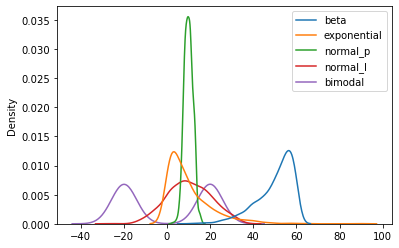

In [6]:
sns.kdeplot(data=df)

In [7]:
# Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.102067,10.132942,9.984585,10.357097,0.034786
std,8.602246,10.335633,2.037582,10.096566,20.155435
min,11.352953,0.000477,2.498854,-25.519886,-28.746578
25%,45.379257,2.585162,8.538781,2.989083,-19.917348
50%,52.474401,7.026642,9.892604,10.062010,0.576204
75%,56.580772,14.210154,11.411801,17.484095,19.993374
max,59.973282,89.304858,16.049029,35.812143,29.858097


<AxesSubplot:ylabel='Density'>

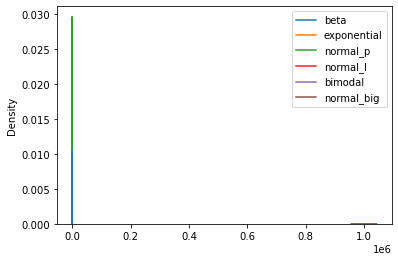

In [8]:
# Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

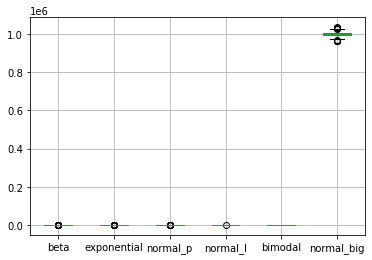

In [9]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
# Chuẩn hóa với Robust Scaling
# Khai báo đối tượng Robust Scaler
scaler = RobustScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.004314,0.496070,-0.131314,-0.509620,0.520273,-0.330427
1,0.002707,-0.515158,-0.141558,-0.307446,0.512737,0.363921
2,-0.116603,1.283076,0.437249,1.540274,0.507051,-0.414685
3,0.521750,0.882217,-0.324131,-0.699121,0.439149,-0.592594
4,0.555806,0.957666,0.283067,0.073746,0.493447,0.007022


<AxesSubplot:ylabel='Density'>

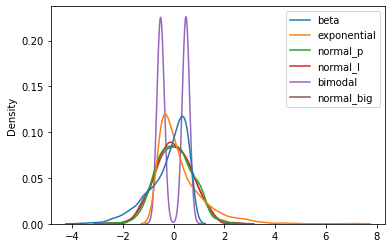

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,-2.117869e-01,2.672088e-01,0.032015,2.035788e-02,-0.013566,0.011922
std,7.679538e-01,8.890873e-01,0.709212,6.965544e-01,0.505013,0.745238
min,-3.671061e+00,-6.044017e-01,-2.573511,-2.454768e+00,-0.734709,-2.583249
25%,-6.334093e-01,-3.820630e-01,-0.471219,-4.879559e-01,-0.513485,-0.486844
50%,-3.171833e-16,3.819102e-17,0.000000,-6.127775e-17,0.000000,0.000000
75%,3.665907e-01,6.179370e-01,0.528781,5.120441e-01,0.486515,0.513156
max,6.694524e-01,7.077701e+00,2.142840,1.776482e+00,0.733685,2.602382


<AxesSubplot:>

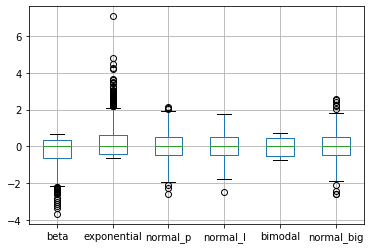

In [15]:
df_s.boxplot()

In [16]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.6710610985372676,
 -0.6044017057733467,
 -2.5735113799767433,
 -2.4547681473608374,
 -0.7347093844047984,
 -2.583248746709627]

In [17]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6694524065061793,
 7.077700914980438,
 2.142840499204618,
 1.7764822925043855,
 0.7336848777355703,
 2.602381889995141]

In [18]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.24744009e+01, 7.02664162e+00, 9.89260422e+00, 1.00620098e+01,
       5.76203853e-01, 9.99661073e+05])